# Notice: Py-Feat ver 0.3.7 ONLY

## check your env is py37pyfeat1

In [1]:
!pip list | grep feat
!python --version
!conda env list

py-feat                            0.3.7
Python 3.8.5
# conda environments:
#
base                  *  /home/dongagent/anaconda3
py37pyfeat1              /home/dongagent/anaconda3/envs/py37pyfeat1
py38featlatest           /home/dongagent/anaconda3/envs/py38featlatest
py38pyfeat               /home/dongagent/anaconda3/envs/py38pyfeat
pyfeat_py310             /home/dongagent/anaconda3/envs/pyfeat_py310
pytorch                  /home/dongagent/anaconda3/envs/pytorch



## Function 1 
### input: the folder of your result
### output: order of the images by Py-Feat

In [9]:
import os
import pandas as pd
def checkEmoOrder(folderPath, emo):
    if os.path.exists(folderPath):
        target_emotion = emo
        ls_name = os.listdir(folderPath)
#         print(ls_name)
        result_dic = {}

        for i in ls_name:
            if 'emotion' in i:
                mypath = os.path.join(folderPath, i)
                temp = pd.read_csv(mypath)
                result = temp[target_emotion][0]
                result = round(result, 6)
                fileName = temp['input'][0]
                result_dic[i[:-12] + '.png'] = result
        # sort in value order 
        res_value_order = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)

#         ##### choose top 10
#         res_value_order = res_value_order[:10]
#         print(target_emotion)
#     #     print(len(res_value_order))
#     #     print(len(res_value_order))
#         for i in res_value_order:
#             print(i)
#         print()
        return res_value_order
    else:
        print("folderNameNotExists")
        
# Test

anger_res = checkEmoOrder('image_analysis/231219Exp16Feat037/anger/', 'anger')
disgust_res = checkEmoOrder('image_analysis/231219Exp16Feat037/disgust/', 'disgust')
fear_res = checkEmoOrder('image_analysis/231219Exp16Feat037/fear/', 'fear')
happy_res = checkEmoOrder('image_analysis/231219Exp16Feat037/happiness/', 'happiness')
sad_res = checkEmoOrder('image_analysis/231219Exp16Feat037/sadness/', 'sadness')
surprise_res = checkEmoOrder('image_analysis/231219Exp16Feat037/surprise/', 'surprise')
def subll(l):
    return [list(x) for x in l]
print(subll(anger_res[:20]), '\n')
print(disgust_res[:20], '\n')
print(fear_res[:20], '\n')
print(happy_res[:20], '\n')
print(sad_res[:20], '\n')
print(surprise_res[:20], '\n')
def subl(l):
    return [x[0] for x in l]

print(subl(anger_res[:20]), '\n')
print(subl(disgust_res[:20]), '\n')
print(subl(fear_res[:20]), '\n')
print(subl(happy_res[:20]), '\n')
print(subl(sad_res[:20]), '\n')
print(subl(surprise_res[:20]), '\n')


[['2023_12_19_14_58_49_anger_230.png', 0.877257], ['2023_12_19_14_55_38_anger_161.png', 0.865016], ['2023_12_19_14_51_46_anger_69.png', 0.862081], ['2023_12_19_15_07_00_anger_400.png', 0.860792], ['2023_12_19_14_51_19_anger_58.png', 0.8548], ['2023_12_19_14_55_06_anger_149.png', 0.850867], ['2023_12_19_15_02_38_anger_312.png', 0.850576], ['2023_12_19_14_53_06_anger_102.png', 0.850181], ['2023_12_19_14_59_26_anger_243.png', 0.846616], ['2023_12_19_15_07_44_anger_413.png', 0.846431], ['2023_12_19_14_51_51_anger_71.png', 0.84205], ['2023_12_19_15_01_18_anger_283.png', 0.838694], ['2023_12_19_14_56_40_anger_184.png', 0.834015], ['2023_12_19_14_58_17_anger_219.png', 0.831978], ['2023_12_19_15_10_12_anger_460.png', 0.83136], ['2023_12_19_14_53_43_anger_116.png', 0.825776], ['2023_12_19_15_10_44_anger_469.png', 0.825715], ['2023_12_19_15_07_47_anger_414.png', 0.823748], ['2023_12_19_14_58_37_anger_226.png', 0.823223], ['2023_12_19_14_55_46_anger_164.png', 0.822629]] 

[('2023_12_19_16_29_34_d

In [73]:
my_res = happy_res

### Util: show Py-Feat res distribution

In [10]:
import matplotlib.pyplot as plt

def showResDistribution(my_res, title):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    x = range(1, len(my_res) + 1)
    y = [i[1] for i in my_res]
    
    plt.scatter(x, y)
    plt.show()

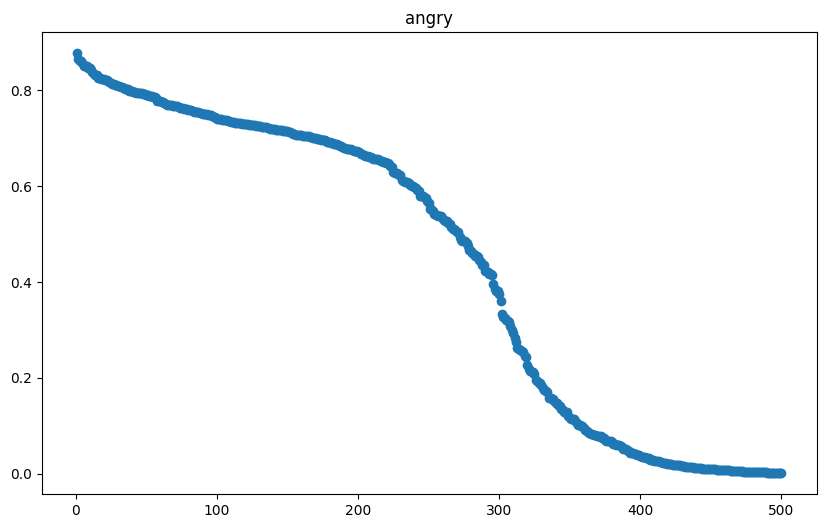

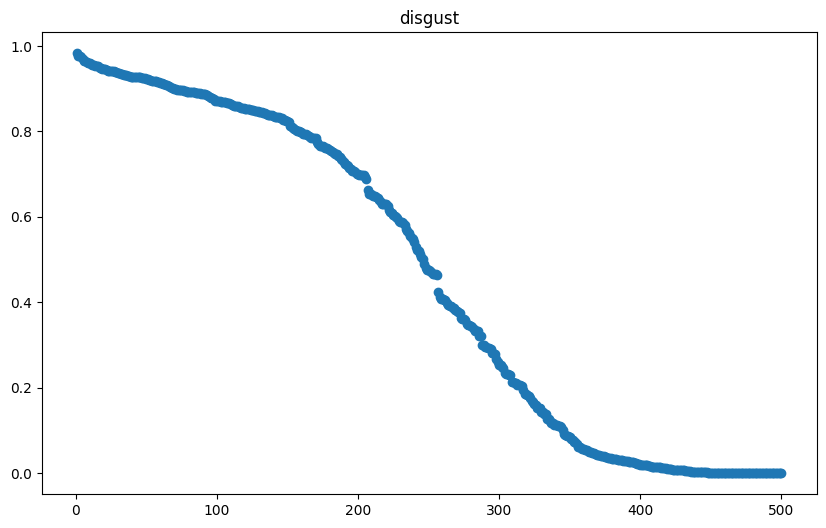

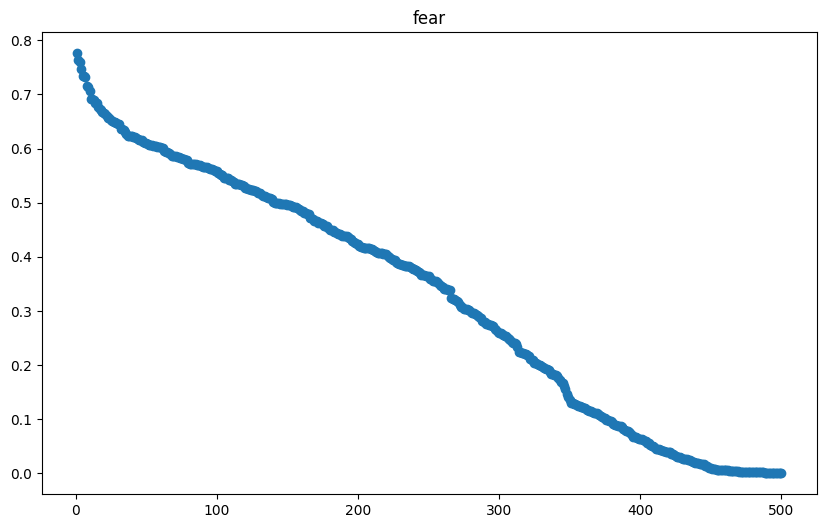

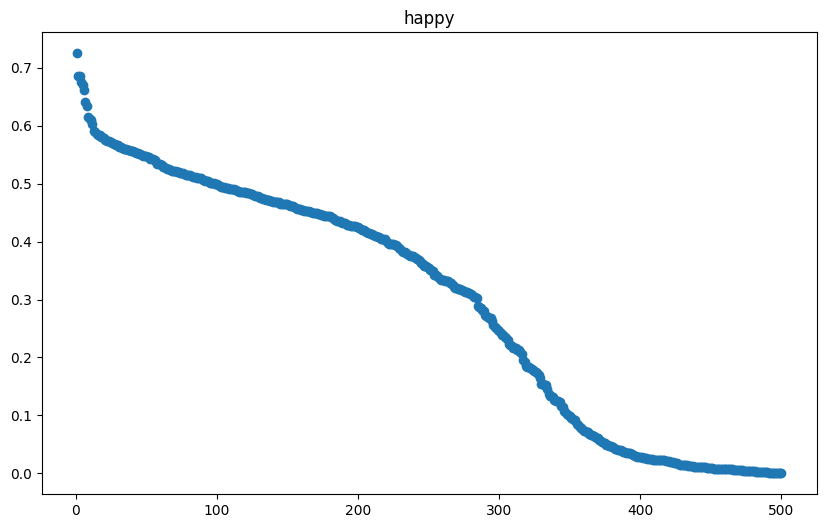

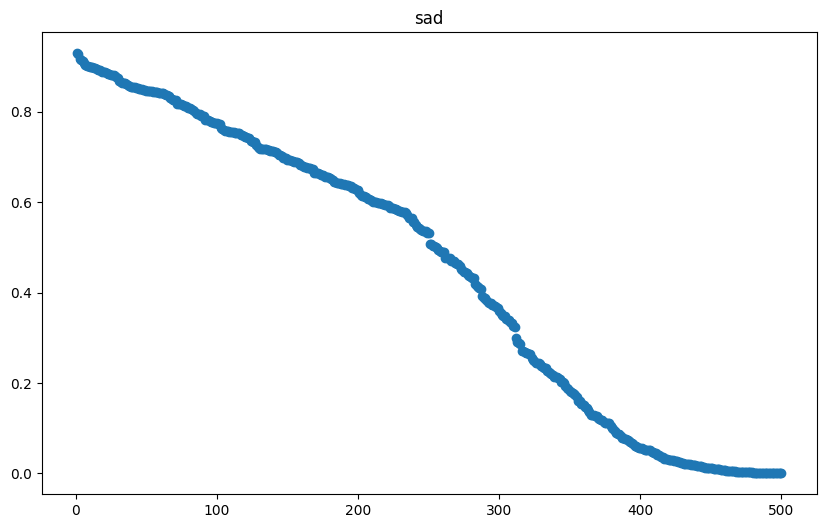

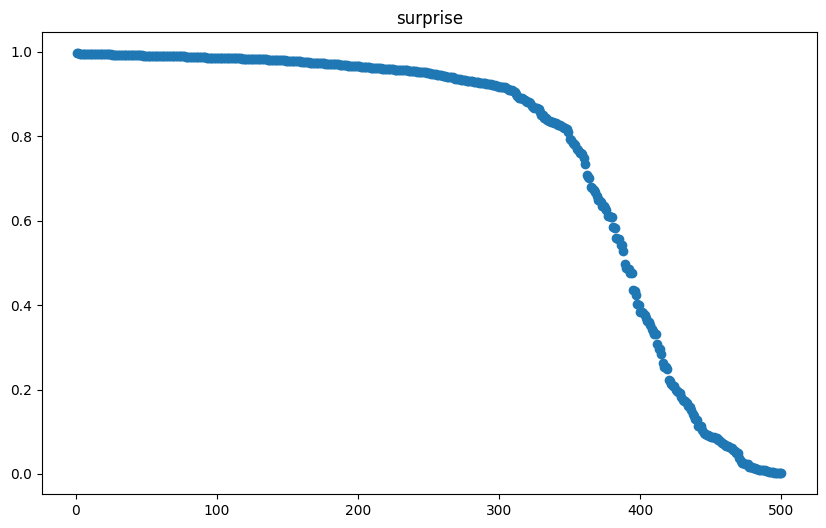

In [11]:
# Anger
showResDistribution(anger_res, 'angry')
showResDistribution(disgust_res, 'disgust')
showResDistribution(fear_res, 'fear')
showResDistribution(happy_res, 'happy')
showResDistribution(sad_res, 'sad')
showResDistribution(surprise_res, 'surprise')

In [30]:
from feat import Detector
detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')
res_d = detector.detect_image('image_analysis/anger/2023_12_18_16_29_10_anger_93.png')


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]


In [31]:
res_d.au_model

'xgb'

In [32]:
res_d.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.294015,0.401234,0.482325,0.340788,0.451529,0.0,0.655109,0.726794,0.477792,0.541492,0.258254,0.12906,0.4044,1.0,0.342711,0.332009,0.999921,0.544249,0.011652,0.631576


In [38]:
res_d.emotions

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.595246,0.036316,0.18013,0.00602,0.028303,0.150242,0.003743


## Function 2: show images one by one
### Input: photo name
### Output: images

In [94]:
import glob, os, shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



def showImages(imglist, figsize=(20,10)):
    images = []
    for img_path in imglist:
        images.append(mpimg.imread(img_path))
    plt.figure(figsize=figsize)
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(image)
#     plt.savefig('test.png', dpi=300)
    
def copyImageToNewFolder(imglist, exp):
    path = f"image_analysis/top20{exp}/"
    if not os.path.exists(path):
        # Create a new directory because it does not exist
        os.makedirs(path)
    for i, image in enumerate(imglist): 
        tmp = image.split('/')[-1]
        shutil.copy(image, os.path.join(path, f'{i+1}_{tmp}'))
    print('Done.')


In [95]:
folder = 'image_analysis/happiness/'

imglist = [os.path.join(folder, my_res[i][0]) for i in range(20)]
# showImages(imglist)
copyImageToNewFolder(imglist, 'happy')

FileNotFoundError: [Errno 2] No such file or directory: 'image_analysis/happiness/2023_12_18_15_31_27_happiness_80.png'

In [76]:
print(imglist)

['image_analysis/happiness/2023_12_18_15_31_27_happiness_80.png', 'image_analysis/happiness/2023_12_18_15_30_35_happiness_63.png', 'image_analysis/happiness/2023_12_18_15_28_59_happiness_31.png', 'image_analysis/happiness/2023_12_18_15_30_38_happiness_64.png', 'image_analysis/happiness/2023_12_18_15_29_06_happiness_33.png', 'image_analysis/happiness/2023_12_18_15_31_03_happiness_72.png', 'image_analysis/happiness/2023_12_18_15_29_31_happiness_41.png', 'image_analysis/happiness/2023_12_18_15_31_56_happiness_90.png', 'image_analysis/happiness/2023_12_18_15_30_53_happiness_69.png', 'image_analysis/happiness/2023_12_18_15_30_45_happiness_66.png', 'image_analysis/happiness/2023_12_18_15_31_37_happiness_83.png', 'image_analysis/happiness/2023_12_18_15_29_18_happiness_37.png', 'image_analysis/happiness/2023_12_18_15_29_39_happiness_44.png', 'image_analysis/happiness/2023_12_18_15_31_59_happiness_91.png', 'image_analysis/happiness/2023_12_18_15_30_17_happiness_57.png', 'image_analysis/happines